In [50]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# IN CASE you don't have pyarrow  and plotlyinstalled, run the following command in your terminal
# pip install pyarrow 
# pip install plotly

In [2]:
# read in the data
df = pd.read_parquet('daily_20221004.parquet.gzip')

In [5]:
# check the data
df.sample(10)

,,time_open,time_high,time_low,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap,quote.USD.timestamp,symbol,id
symbol_id,time_close,,,,,,,,,,,,
SCRT_5604,2021-01-21T00:59:59.999Z,2021-01-21T00:00:00.000Z,2021-01-21T00:32:05.000Z,2021-01-21T00:00:05.000Z,1.442179,1.486286,1.442179,1.464534,2.042655e+06,1.020831e+08,2021-01-21T00:59:59.999Z,SCRT,5604
XDC_2634,2019-12-05T00:59:59.999Z,2019-12-05T00:00:00.000Z,2019-12-05T00:49:02.000Z,2019-12-05T00:07:05.000Z,0.000817,0.000820,0.000814,0.000819,NaN,3.217147e+06,2019-12-05T00:59:59.999Z,XDC,2634
BEL_6928,2020-10-28T00:59:59.999Z,2020-10-28T00:00:00.000Z,2020-10-28T00:33:05.000Z,2020-10-28T00:58:05.000Z,0.825766,0.828400,0.823494,0.823515,2.779490e+06,1.194097e+07,2020-10-28T00:59:59.999Z,BEL,6928
NABOX_9653,2021-07-31T00:59:59.999Z,2021-07-31T00:00:00.000Z,2021-07-31T00:40:25.000Z,2021-07-31T00:11:25.000Z,0.000013,0.000013,0.000013,0.000013,3.408128e+05,0.000000e+00,2021-07-31T00:59:59.999Z,NABOX,9653
MVL_2982,2020-05-11T00:59:59.999Z,2020-05-11T00:00:00.000Z,2020-05-11T00:04:06.000Z,2020-05-11T00:54:06.000Z,0.000354,0.000354,0.000345,0.000345,NaN,2.642707e+06,2020-05-11T00:59:59.999Z,MVL,2982
IDIA_10933,2021-11-22T00:59:59.999Z,2021-11-22T00:00:00.000Z,2021-11-22T00:08:08.000Z,2021-11-22T00:46:10.000Z,2.496365,2.507217,2.453941,2.462857,2.834760e+06,1.108286e+08,2021-11-22T00:59:59.999Z,IDIA,10933
CORE_7242,2021-11-05T00:59:59.999Z,2021-11-05T00:00:00.000Z,2021-11-05T00:41:03.000Z,2021-11-05T00:52:03.000Z,8946.459213,9021.960716,8874.751655,8883.871647,3.148949e+04,8.883872e+07,2021-11-05T00:59:59.999Z,CORE,7242
FSN_2530,2020-01-04T00:59:59.999Z,2020-01-04T00:00:00.000Z,2020-01-04T00:50:07.000Z,2020-01-04T00:43:05.000Z,0.149474,0.151475,0.148093,0.149065,NaN,5.264196e+06,2020-01-04T00:59:59.999Z,FSN,2530
HOPR_6520,2021-10-23T00:59:59.999Z,2021-10-23T00:00:00.000Z,2021-10-23T00:31:05.000Z,2021-10-23T00:54:05.000Z,0.261238,0.261670,0.260204,0.260485,6.355742e+05,0.000000e+00,2021-10-23T00:59:59.999Z,HOPR,6520


In [13]:
# Check column names
print(df.columns)
print('There are {} columns in the dataset'.format(len(df.columns)))

Index(['time_open', 'time_high', 'time_low', 'quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap', 'quote.USD.timestamp',
       'symbol', 'id'],
      dtype='object')
There are 12 columns in the dataset


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1243591 entries, ('MPH_7742', '2020-11-23T00:59:59.999Z') to ('CXO_2490', '2022-07-05T00:59:59.999Z')
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   time_open             1243591 non-null  object 
 1   time_high             1243071 non-null  object 
 2   time_low              1243071 non-null  object 
 3   quote.USD.open        1243591 non-null  float64
 4   quote.USD.high        1243591 non-null  float64
 5   quote.USD.low         1243591 non-null  float64
 6   quote.USD.close       1243591 non-null  float64
 7   quote.USD.volume      742019 non-null   float64
 8   quote.USD.market_cap  1243591 non-null  float64
 9   quote.USD.timestamp   1243591 non-null  object 
 10  symbol                1243591 non-null  object 
 11  id                    1243591 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 118.8+ MB


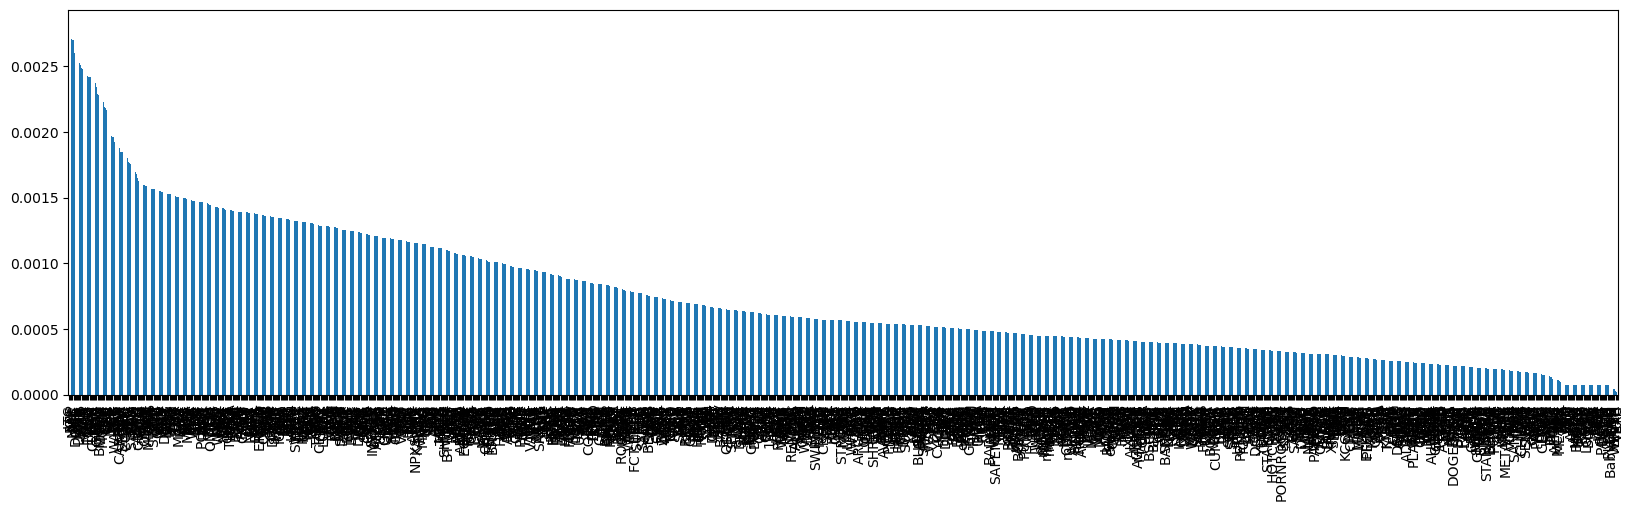

In [15]:
# check for digital currency distribution:
df['symbol'].value_counts(normalize= True).plot(kind='bar', figsize=(20,5));

In [20]:
df['date'] = df['time_high'].str.slice(0,10)
df['date'] = pd.to_datetime(df['date'])

In [66]:
# df.info()
df_vual = df[['date', 'quote.USD.high', 'quote.USD.low']].reset_index()
df_vual = df_vual[['symbol_id','date', 'quote.USD.high', 'quote.USD.low']]
print('There are {} unique digital currencies in the dataset'.format(len(df_vual['symbol_id'].unique())))

There are 1375 unique digital currencies in the dataset


In [62]:
df_vual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243591 entries, 0 to 1243590
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   symbol_id       1243591 non-null  object        
 1   date            1243071 non-null  datetime64[ns]
 2   quote.USD.high  1243591 non-null  float64       
 3   quote.USD.low   1243591 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 38.0+ MB


In [72]:
df_vual['quote_mean'] = (df_vual['quote.USD.high'] + df_vual['quote.USD.low'])/2
df_vual['month'] = df_vual['date'].astype(str).str.slice(5,7)
df_vual['year'] = df_vual['date'].astype(str).str.slice(0,4)
df_vual['year_month'] = df_vual['year'].astype(str) + '-' + df_vual['month'].astype(str)

In [73]:
df_vual.head()

,symbol_id,date,quote.USD.high,quote.USD.low,quote_mean,month,year,year_month
0,MPH_7742,2020-11-23,90.554933,79.852330,85.203631,11,2020,2020-11
1,MPH_7742,2020-11-24,85.161030,80.694133,82.927581,11,2020,2020-11
2,MPH_7742,2020-11-25,57.527366,53.679986,55.603676,11,2020,2020-11
3,MPH_7742,2020-11-26,40.121814,38.980499,39.551156,11,2020,2020-11
4,MPH_7742,2020-11-27,30.391962,29.690305,30.041133,11,2020,2020-11
